## PART - 1

In [1]:
# importing the necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading data in notebook
data=pd.read_csv(r"C:\Users\HP\Downloads\Admission_Predict.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
# checking the shape of datafframe
data.shape

(400, 9)

In [5]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


* There are total 9 columns present in dataset.
* Dataset have no null values in it.
* There are 4 features columns having data type of float64
* There are 5 features columns having data type of int64.

In [6]:
# Describe the statistical calculation of the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [7]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

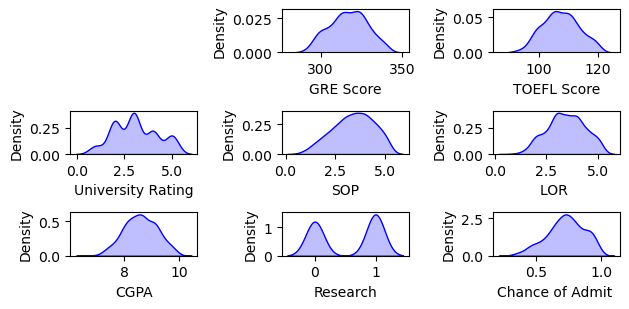

In [8]:
for i in range(1, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sb.kdeplot(x=data[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

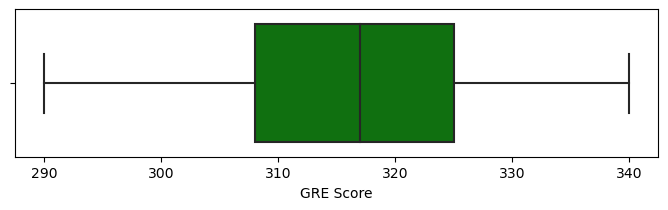

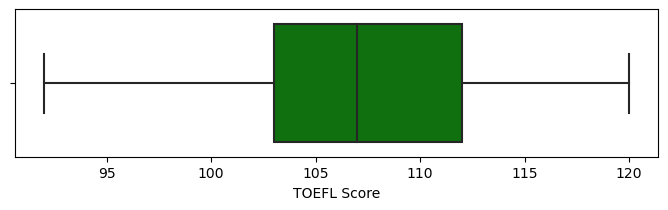

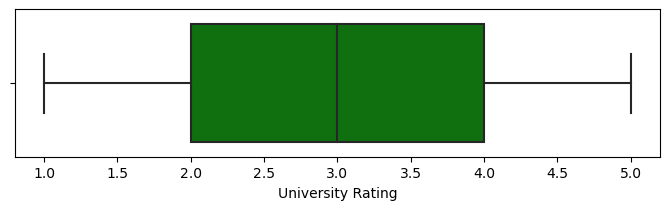

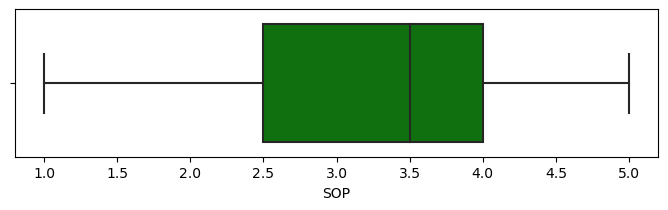

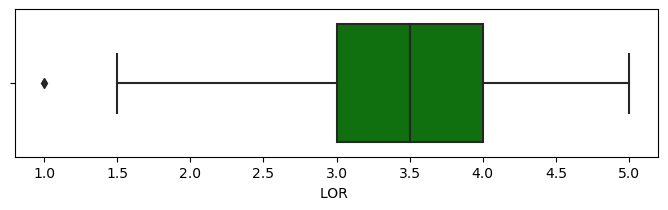

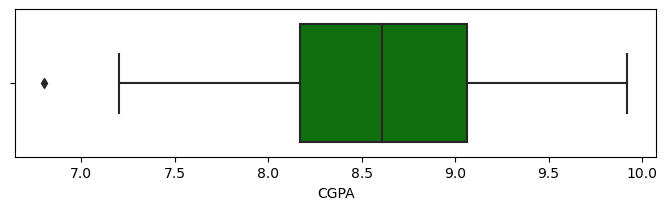

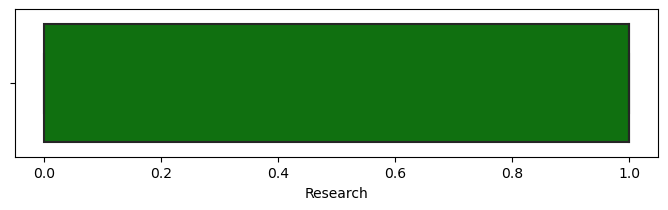

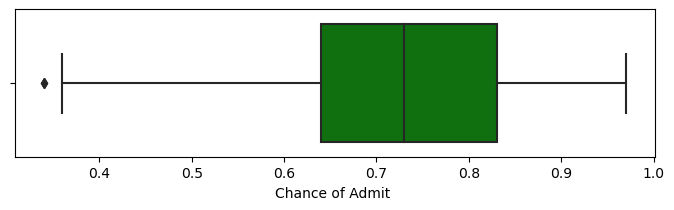

In [9]:
# checking for outliers.
for i in range(1, len(numeric_features)):
    plt.figure(figsize=(20,10))
    plt.subplot(5, 3, i+1)
    sb.boxplot(x=data[numeric_features[i]], color='g')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

* The column  LOR ,CGPA and chance of admit has the outlier in it.

### Univariate Analysing

In [10]:
# for Gre Score
data["GRE Score"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: GRE Score
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


In [11]:
data["GRE Score"].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

<Axes: xlabel='GRE Score', ylabel='Count'>

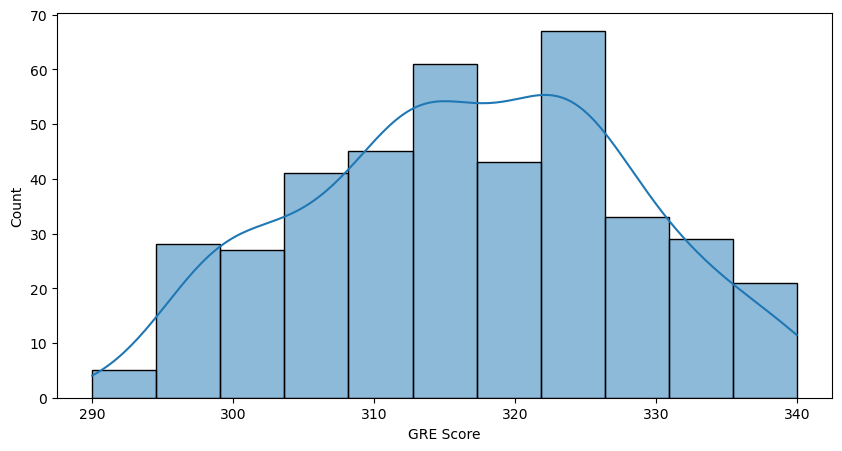

In [12]:
#plot a bar plot
plt.figure(figsize=(10,5))
sb.histplot(x="GRE Score",data=data,kde=True)


* We observed that there are maximum number of students who score more than 322 and below 328. 

In [13]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


<Figure size 1000x2000 with 0 Axes>

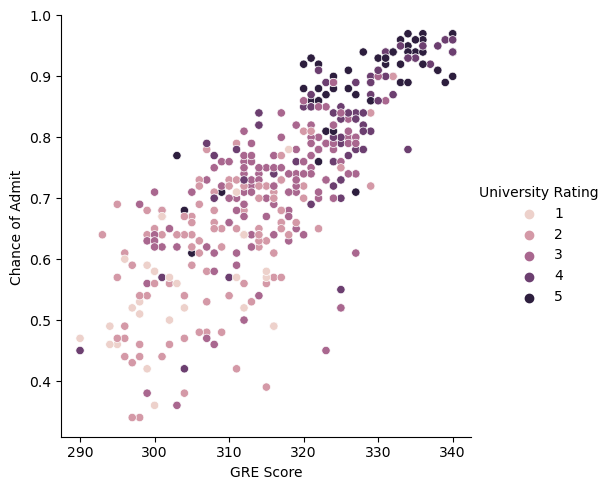

In [14]:
# checking the relation of GRE score and  their change of admit .
plt.figure(figsize=(10,20))
sb.relplot(x="GRE Score",y="Chance of Admit ",hue="University Rating",data=data)


* There is a inclined correlation between GRE Score and Chance of Admit.
* The maximum GRE Score has the  high Chance of getting admitted in  a high rating University. 

In [15]:
# For TOEFL Score
data["TOEFL Score"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: TOEFL Score
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


* There is no null values in it.

In [16]:
data["TOEFL Score"].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

* We have maximum score of 120 and minimum score of 92 in TOEFL Score .


<Axes: xlabel='TOEFL Score', ylabel='Count'>

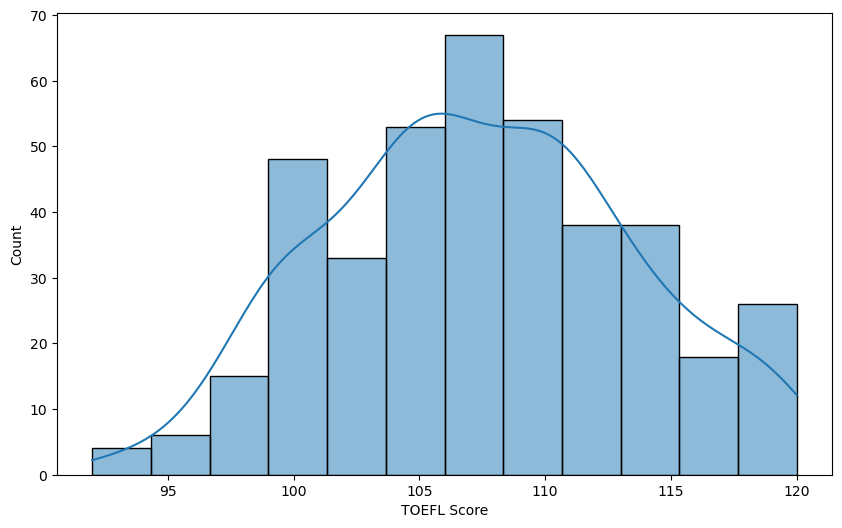

In [17]:
# Checking the graph and a curve of TOEFL Score
plt.figure(figsize=(10,6))
sb.histplot(x="TOEFL Score",kde=True,data=data)

* There are highest numbers of students in series who has score between 106 -108.
* There are less than 10 students who has low score between 92-94.

Text(0.5, 1.0, 'Relation between TOEFL Score and Chance of Admit')

<Figure size 1000x600 with 0 Axes>

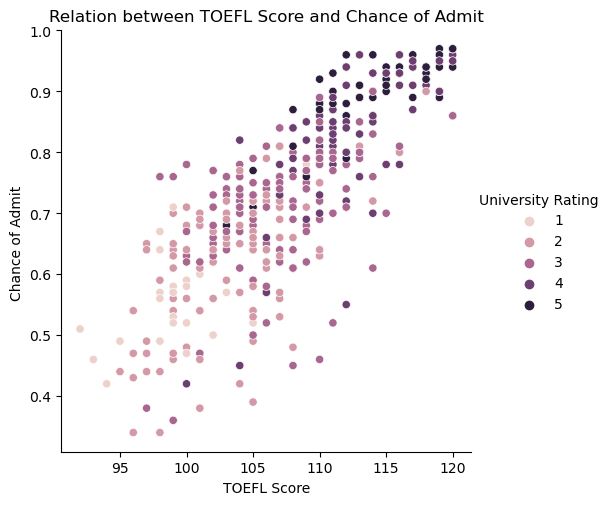

In [18]:
# checking its relation with Chance of admit and university rating.
plt.figure(figsize=(10,6))
sb.relplot(x="TOEFL Score",y="Chance of Admit ",hue="University Rating",data=data)
plt.title("Relation between TOEFL Score and Chance of Admit")

* There is a inclined correlation between TOEFL Score and Chance of Admit.
* The maximum TOEFL Score has the high Chance of getting admitted in a high rating University.

In [19]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [20]:
# For SOP 
data["SOP"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: SOP
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


* There is no null values in it.

In [21]:
data["SOP"].describe()

count    400.000000
mean       3.400000
std        1.006869
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

<Axes: xlabel='SOP', ylabel='Count'>

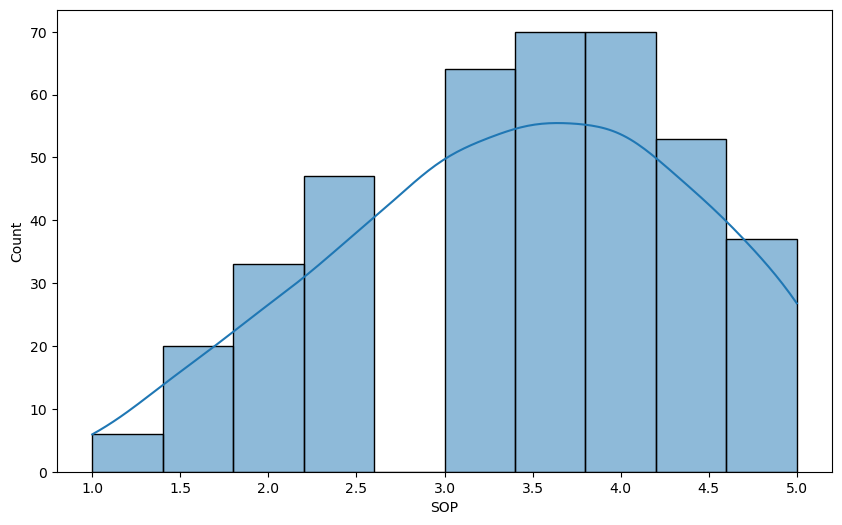

In [22]:
# Checking the graph and a curve of SOP 
plt.figure(figsize=(10,6))
sb.histplot(x="SOP",kde=True,data=data)

* There are highest count values who has range between 3.4 - 4.2 . 
* There are less than 10 students who has low range between 1.0-1.4.

Text(0.5, 1.0, 'Relation between SOP and Chance of Admit')

<Figure size 1000x600 with 0 Axes>

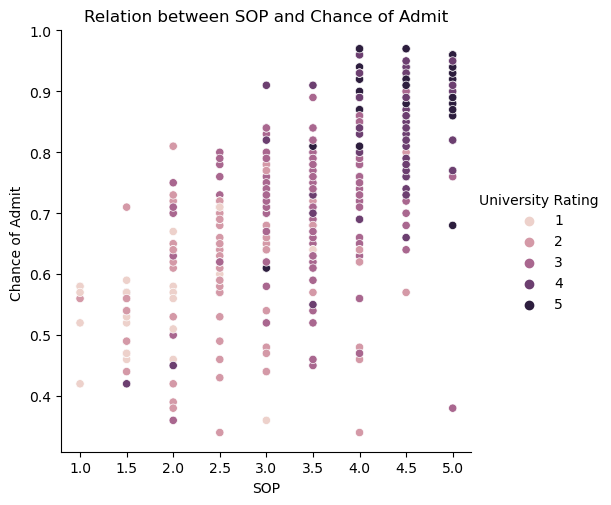

In [23]:
# checking its relation with Chance of admit and university rating.
plt.figure(figsize=(10,6))
sb.relplot(x="SOP",y="Chance of Admit ",hue="University Rating",data=data,)
plt.title("Relation between SOP and Chance of Admit")

In [24]:
#For LOR
data["LOR "].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: LOR 
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


* There is no null values in it.

<Axes: xlabel='LOR ', ylabel='Count'>

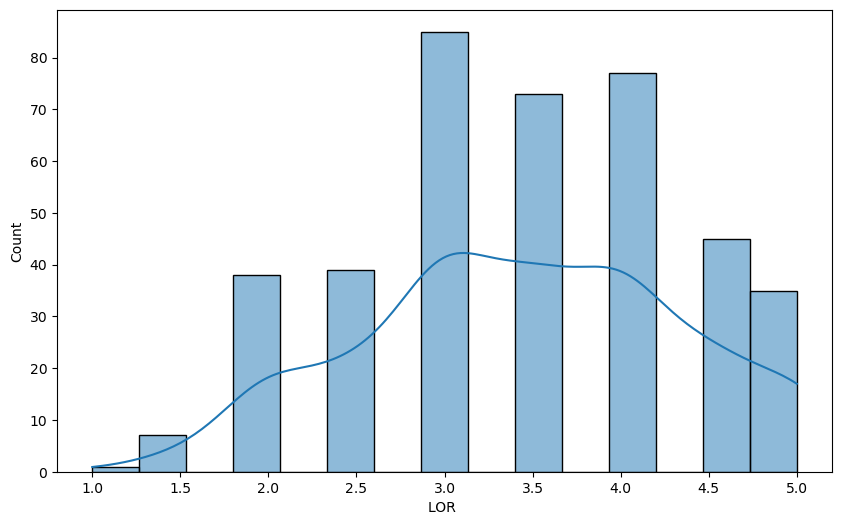

In [25]:
# Checking the graph and a curve of LOR
plt.figure(figsize=(10,6))
sb.histplot(x="LOR ",kde=True,data=data)

* We have maximum number of counts in 3.0.
* We have minimum number of counts in range between 1.0 - 1.2


Text(0.5, 1.0, 'Relation between LOR and Chance of Admit')

<Figure size 1000x600 with 0 Axes>

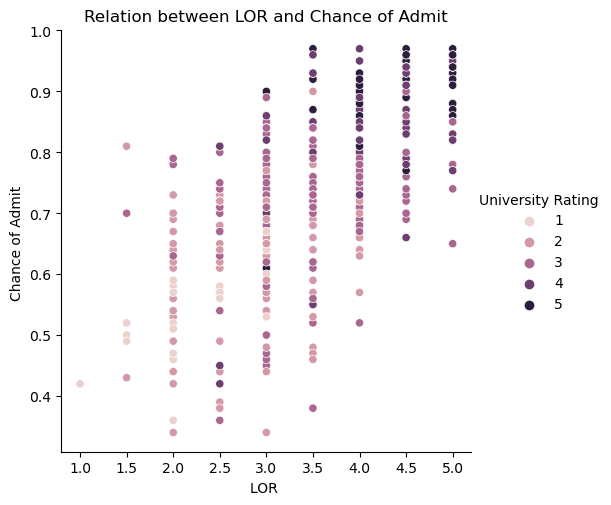

In [26]:
# checking its relation with Chance of admit and university rating.
plt.figure(figsize=(10,6))
sb.relplot(x="LOR ",y="Chance of Admit ",hue="University Rating",data=data,)
plt.title("Relation between LOR and Chance of Admit")

<Axes: ylabel='LOR '>

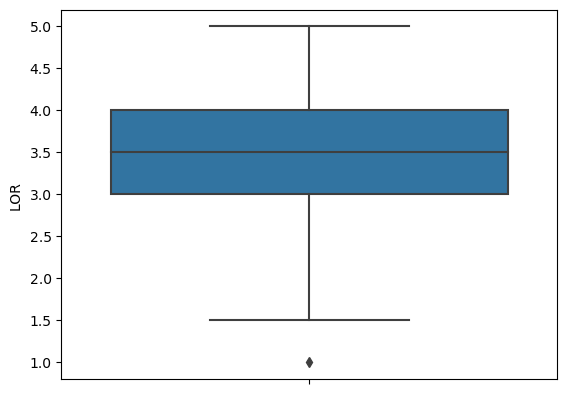

In [27]:
# plotting boxplot to check for outliers.
sb.boxplot(y='LOR ',data=data)

*There is an outlier present in LOR column.

In [28]:
#  Seting the boundaries for Removing the outlier from the LOR Column.
Q1=data["LOR "].quantile(0.25)
Q3=data["LOR "].quantile(0.75)

# inter quarter range
IQR = Q3 - Q1
IQR

lowerbound=Q1 - 1.5*IQR
upperbound=Q3 + 1.58*IQR


In [29]:
# Removing the total outlier from the LOR column.
outlier=data["LOR "][(data["LOR "]>=lowerbound) & (data["LOR "]<=upperbound)]

<Axes: ylabel='LOR '>

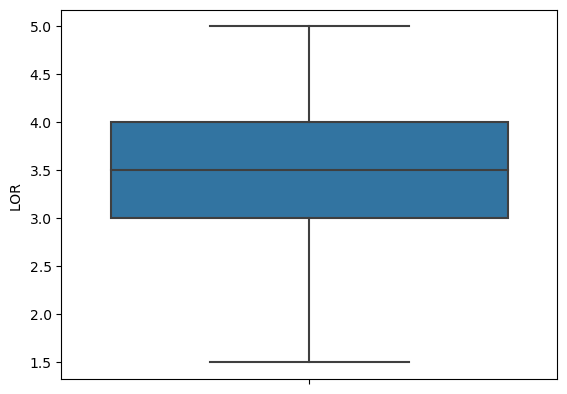

In [30]:
# checking it plotting the box plot again
sb.boxplot(y=outlier,data=data)

* The outliers are successfully removed from the LOR column.